In [0]:
# Package imports

#!pip install torch

import numpy as np
import matplotlib.pyplot as plt
import torch

In [0]:
# Tensorflow and relevant package imports

#!pip install tensorflow==2.0.0

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [0]:
# Loading Google drive to store the model

from google.colab import drive 
drive.mount('/content/gdrive')

MODEL_NAME = 'pk_fashion_mnist.pt'
PATH = './gdrive/My Drive/Colab Notebooks/Fashion MNIST/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Load dataset

from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
# Defining hyperparameters

IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_DEPTH = 1

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_DEPTH)

In [0]:
# Defining class labels

CLASSES = 10

classLabels = {
    0: 'T-shirt / Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

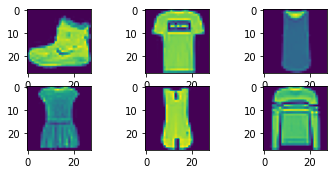

In [0]:
# Plotting first 6 images

for i in range(6):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])

plt.show()

In [0]:
# Reshape data

x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0

In [0]:
# One hot encoding target values

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
# Defining the model

model = Sequential()

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.compile(
  optimizer='adam', 
  loss='categorical_crossentropy', 
  metrics=['accuracy']
)

In [0]:
history = model.fit(
  x_train, y_train, 
  validation_data=(x_test, y_test), 
  epochs=7
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.3798 - accuracy: 0.8663 - val_loss: 0.2966 - val_accuracy: 0.8934
Epoch 2/7
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.2563 - accuracy: 0.9081 - val_loss: 0.2957 - val_accuracy: 0.8904
Epoch 3/7
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.2176 - accuracy: 0.9210 - val_loss: 0.2544 - val_accuracy: 0.9109
Epoch 4/7
60000/60000 [==============================] - 227s 4ms/sample - loss: 0.1905 - accuracy: 0.9304 - val_loss: 0.2486 - val_accuracy: 0.9130
Epoch 5/7
60000/60000 [==============================] - 227s 4ms/sample - loss: 0.1658 - accuracy: 0.9399 - val_loss: 0.2431 - val_accuracy: 0.9167
Epoch 6/7
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.1478 - accuracy: 0.9452 - val_loss: 0.2557 - val_accuracy: 0.9171
Epoch 7/7
60000/60000 [==============================] -

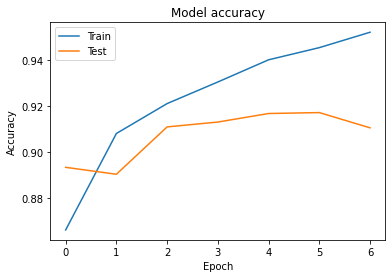

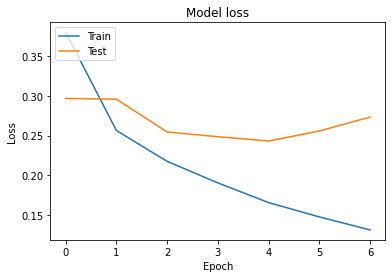

In [0]:
# Plot accuracy and loss values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Print predicted vs expected output

def get_index(list, maxValue):
  for index in range(CLASSES):
    if list[index] == maxValue:
      return index

print('Predicted \tExpected')

for i in range(10):
  predictedOutputs = model.predict(x_test[i])
  predictedOutput = int(max(predictedOutputs))

  expectedOutputs = y_test[i]
  expectedOutput = get_index(expectedOutputs, max(expectedOutputs))
  
  print('{} \t{}'.format(classLabels[predictedOutput], classLabels[expectedOutput]))

Predicted 	Expected


ValueError: ignored